In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
data=pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\XGBM & LGBM\\XGBM & LGBM\\Titanic_test.csv")
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

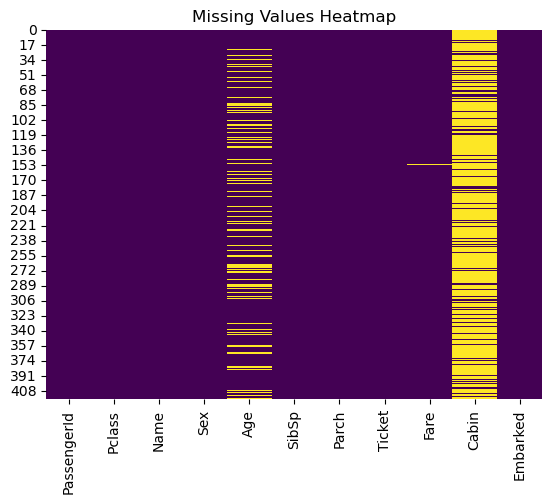

In [9]:
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

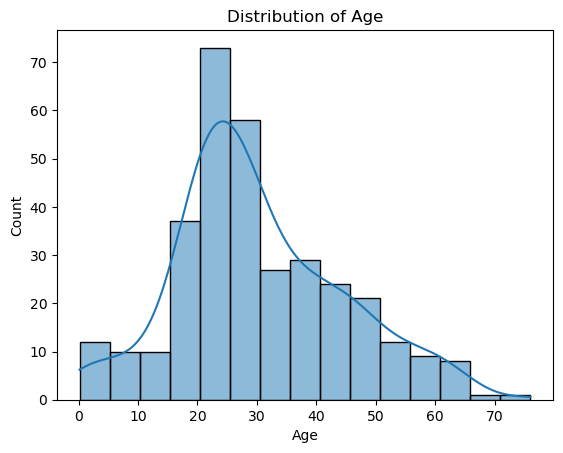

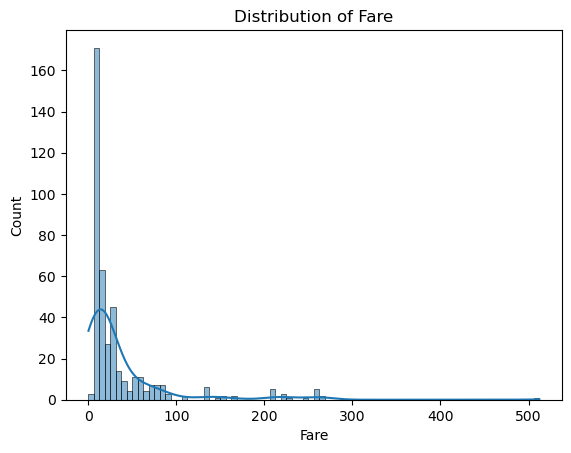

In [13]:
# Distribution of numerical features
num_features = ['Age', 'Fare']
for feature in num_features:
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

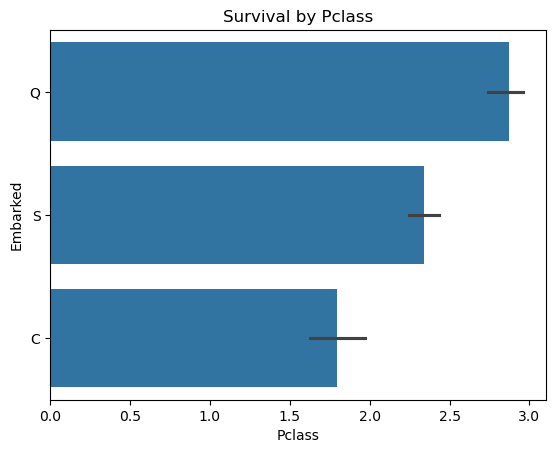

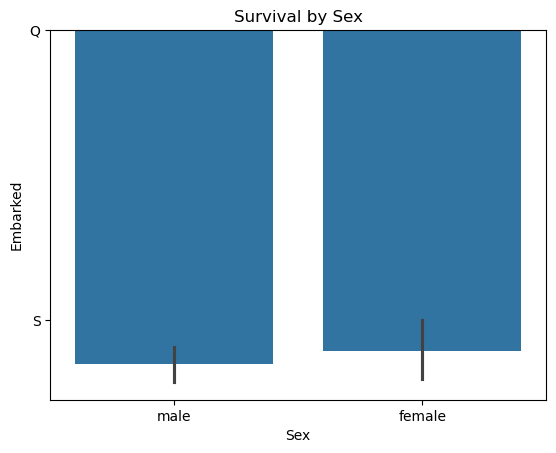

In [17]:
# Survival vs categorical features
sns.barplot(x="Pclass", y="Embarked", data=data)
plt.title("Survival by Pclass")
plt.show()

sns.barplot(x="Sex", y="Embarked", data=data)
plt.title("Survival by Sex")
plt.show()

In [23]:
# Step 3: Data Preprocessing
# Define preprocessing steps
num_features = ['Age', 'Fare']
cat_features = ['Pclass', 'Sex', 'Embarked']

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
num_transformer


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [25]:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first"))
])
cat_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first'))])

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [33]:
X = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"])
y = data["Embarked"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test 

(     Pclass   Sex   Age  SibSp  Parch     Fare
 336       2  male  32.0      0      0  13.0000
 31        2  male  24.0      2      0  31.5000
 84        2  male   NaN      0      0  10.7083
 287       1  male  24.0      1      0  82.2667
 317       2  male  19.0      0      0  10.5000
 ..      ...   ...   ...    ...    ...      ...
 71        3  male  21.0      0      0   7.8958
 106       3  male  21.0      0      0   7.8208
 270       1  male  46.0      0      0  75.2417
 348       2  male  24.0      0      0  13.5000
 102       3  male   NaN      0      0   7.7500
 
 [334 rows x 6 columns],
      Pclass     Sex   Age  SibSp  Parch      Fare
 321       3    male  25.0      0      0    7.2292
 324       1  female  39.0      0      0  211.3375
 388       3    male  21.0      0      0    7.7500
 56        3    male  35.0      0      0    7.8958
 153       3  female  36.0      0      2   12.1833
 ..      ...     ...   ...    ...    ...       ...
 57        3    male  25.0      0      0

In [35]:
# Step 4: Model Building
# LightGBM Pipeline
lgbm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LGBMClassifier(random_state=42))
])
lgbm_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LGBMClassifier(random_state=42))])

In [53]:
# XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
xgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier',
                 XGBClassi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import lightgbm as lgb
import xgboost as xgb


In [3]:
data = pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\XGBM & LGBM\\XGBM & LGBM\\Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

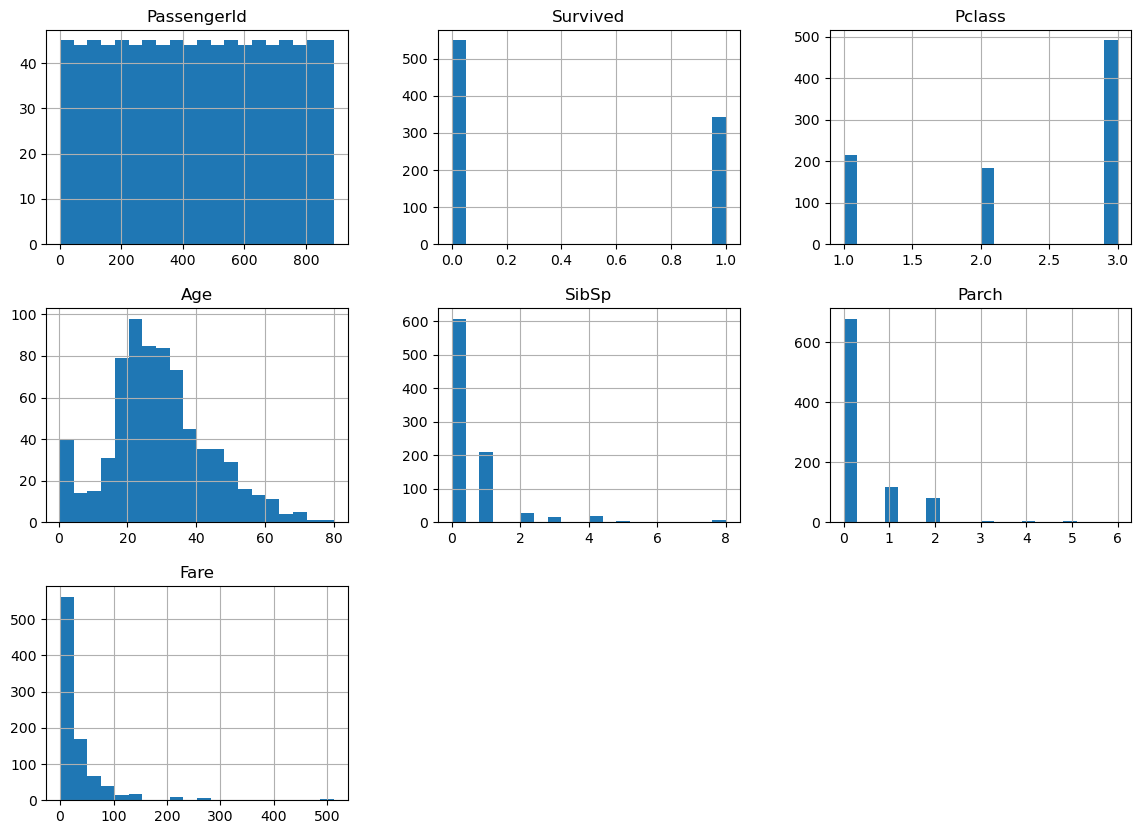

In [13]:
# Histograms 
data.hist(bins=20, figsize=(14, 10))
plt.show()

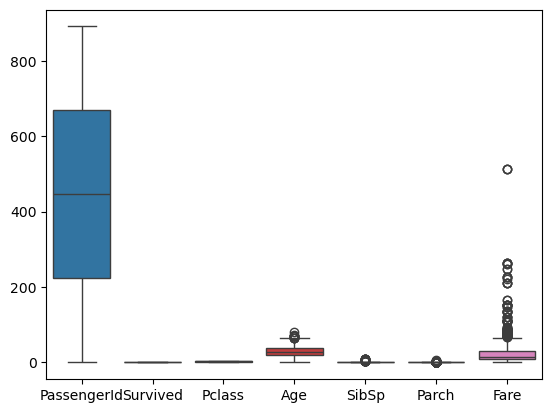

In [15]:
 #Boxplots
sns.boxplot(data=data.select_dtypes(include=np.number))
plt.show()

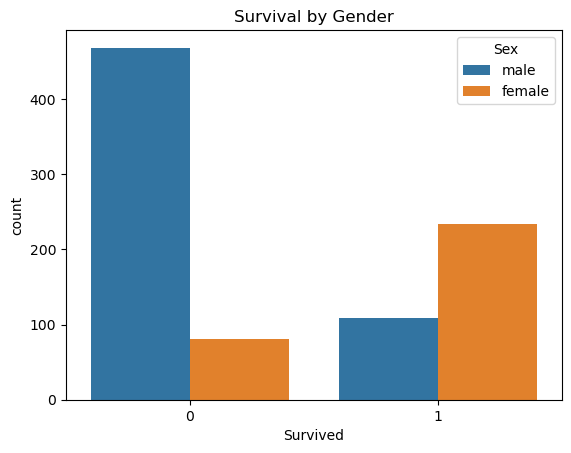

In [17]:
# Visualize relationships with Survival
sns.countplot(data=data, x='Survived', hue='Sex')
plt.title("Survival by Gender")
plt.show()


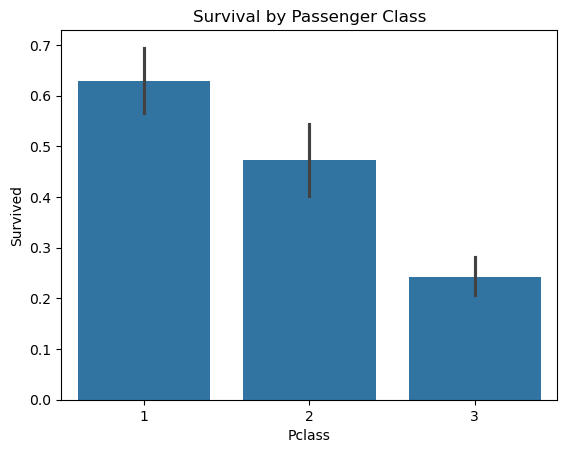

In [19]:

sns.barplot(data=data, x='Pclass', y='Survived')
plt.title("Survival by Passenger Class")
plt.show()


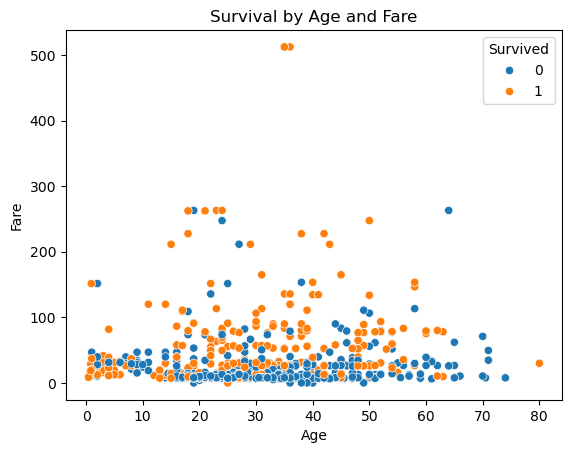

In [21]:
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.title("Survival by Age and Fare")
plt.show()

In [33]:
# Ensure 'Embarked' is treated as a string/object
data['Embarked'] = data['Embarked'].astype(str)

# Impute missing values in 'Embarked' with the most frequent value
# Impute missing values in 'Embarked' with the most frequent value
imputer_embarked = SimpleImputer(strategy='most_frequent')
data['Embarked'] = imputer_embarked.fit_transform(data[['Embarked']]).ravel()

data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [35]:
# Split data into features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test 

(     PassengerId  Pclass                                Name     Sex  \
 331          332       1                 Partner, Mr. Austen    male   
 733          734       2          Berriman, Mr. William John    male   
 382          383       3                  Tikkanen, Mr. Juho    male   
 704          705       3             Hansen, Mr. Henrik Juul    male   
 813          814       3  Andersson, Miss. Ebba Iris Alfrida  female   
 ..           ...     ...                                 ...     ...   
 106          107       3    Salkjelsvik, Miss. Anna Kristine  female   
 270          271       1               Cairns, Mr. Alexander    male   
 860          861       3             Hansen, Mr. Claus Peter    male   
 435          436       1           Carter, Miss. Lucile Polk  female   
 102          103       1           White, Mr. Richard Frasar    male   
 
            Age  SibSp  Parch             Ticket      Fare    Cabin Embarked  
 331  45.500000      0      0             1

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Encode categorical variables
label_encoder_sex = LabelEncoder()
data['Sex'] = label_encoder_sex.fit_transform(data['Sex'])

label_encoder_embarked = LabelEncoder()
data['Embarked'] = label_encoder_embarked.fit_transform(data['Embarked'])

# Split features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM Model
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
lgb_y_pred = lgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [43]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [47]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

print("\n--- LightGBM Evaluation ---")
evaluate_model(y_test, lgb_y_pred, "LightGBM")

print("\n--- XGBoost Evaluation ---")
evaluate_model(y_test, xgb_y_pred, "XGBoost")


--- LightGBM Evaluation ---
LightGBM Performance:
Accuracy: 0.7877094972067039
Precision: 0.7432432432432432
Recall: 0.7432432432432432
F1 Score: 0.7432432432432432
Confusion Matrix:
 [[86 19]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


--- XGBoost Evaluation ---
XGBoost Performance:
Accuracy: 0.7932960893854749
Precision: 0.7605633802816901
Recall: 0.7297297297297297
F1 Score: 0.7448275862068966
Confusion Matrix:
 [[88 17]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
 

In [51]:
# Comparative Analysis Visualization
metrics = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, lgb_y_pred), accuracy_score(y_test, xgb_y_pred)],
    "Precision": [precision_score(y_test, lgb_y_pred), precision_score(y_test, xgb_y_pred)],
    "Recall": [recall_score(y_test, lgb_y_pred), recall_score(y_test, xgb_y_pred)],
    "F1 Score": [f1_score(y_test, lgb_y_pred), f1_score(y_test, xgb_y_pred)],
}
metrics_data = pd.DataFrame(metrics)
metrics_data 

,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.787709,0.743243,0.743243,0.743243
1,XGBoost,0.793296,0.760563,0.729730,0.744828


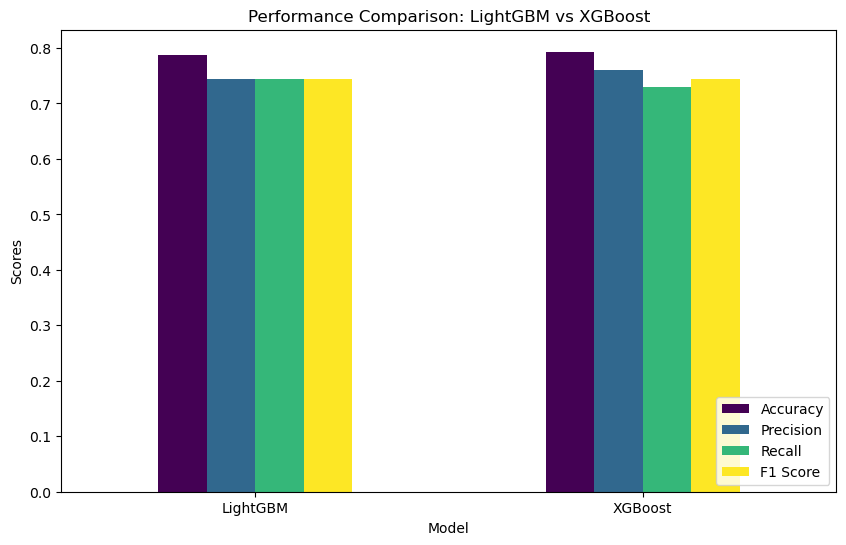

In [53]:
# Bar plot for comparison
metrics_data.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Scores")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()